In [1]:
from util import humanize_bytes
from proofs import *
from proofs_analysis import *
from perf_data import *
import matplotlib.pyplot as plt
import numpy as np

ZigZag nodes: 33554432


In [2]:
filecoin_scaling_requirements.satisfied_by(bad_performance)

False

In [3]:
ec2_x1e32_xlarge.proving_time_per_constraint / porcuquine_prover.proving_time_per_constraint

37.227600826731724

In [4]:
porcuquine = ZigZag(security=filecoin_security_requirements, instance=porcuquine_prover)

In [5]:
x1e32 = ZigZag(security=filecoin_security_requirements, instance=ec2_x1e32_xlarge, partitions=8)

In [6]:
p = porcuquine.performance()

In [7]:
pp = x1e32.performance()

In [8]:
p.total_seal_time

13622.183646812999

In [9]:
pp.total_seal_time

3562191.193646813

`pp.total_seal_time` is much higher than `p.total_seal_time` because of 8 partitions and sufficient challenges.

In [10]:
humanize_bytes(p.proof_size)

'288.0 bytes'

In [11]:
humanize_bytes(pp.proof_size)

'1.6 kB'

In [12]:
porcuquine_blake = porcuquine.scaled_for_new_hash(blake2s)

In [13]:
porcuquine_blake.performance().total_seal_time

96103.64807561404

In [14]:
porcuquine.justifies_seal_time(512 * GiB, filecoin_scaling_requirements)

False

In [15]:
x1e32.justifies_seal_time(512 * GiB, filecoin_scaling_requirements)

False

In [16]:
porcuquine_blake.justifies_seal_time(512 * GiB, filecoin_scaling_requirements)

True

*TODO*
  - [x] check all against a range of seal times;
  - [x] make graphs
  - [x] try with pedersen/blake hybrid, varying `root_height`
  - [x] search space for a combination of `root_height` and sector size which justifies seal time


In [17]:
porcuquine_pb50 = porcuquine.scaled_for_new_hash(pb50)

In [18]:
porcuquine_pb50.justifies_seal_time(GiB, filecoin_scaling_requirements)

False

In [19]:
porcuquine_pb50.justifies_seal_time(512 * GiB, filecoin_scaling_requirements)

False

In [20]:
porcuquine_pb50.justifies_seal_time(2048 * GiB, filecoin_scaling_requirements)

False

In [21]:
porcuquine_pb50.performance().total_seal_time

54862.915861213514

In [22]:
porcuquine_pb50.performance(2048 * GiB).total_seal_time

7965.603401616834

In [23]:
porcuquine.performance(2048 * GiB).total_seal_time

9231.338661461436

In [24]:
porcuquine.performance().total_seal_time

13622.183646812999

In [25]:
filecoin_scaling_requirements.total_seal_time

7200.0

In [26]:
filecoin_scaling_requirements.proof_size

25.0

In [27]:
porcuquine.performance().proof_size

288.0

In [28]:
x1e32.performance(64 * GiB).proof_size

25.5

In [29]:
x1e32.performance(66 * GiB).proof_size

24.727272727272727

In [30]:
x1e32.performance(66 * GiB).total_seal_time

63661.7239498433

In [31]:
x1e32.performance(2048 * GiB).total_seal_time

11572.741010094249

In [32]:
x1_pb50 = x1e32.scaled_for_new_hash(pb50)

In [33]:
x1_pb50.performance(66 * GiB).total_seal_time

86060.16765255856

In [34]:
x1_pb50.performance(2048 * 4 * GiB).total_seal_time

8875.854846538696

In [35]:
x1_blake2s = x1e32.scaled_for_new_hash(blake2s)

In [36]:
x1_blake2s.performance(66 * GiB).total_seal_time

108458.61135527385

In [37]:
x1_pb50.justifies_seal_time(2048 * 4 * GiB, filecoin_scaling_requirements)

False

**We have a first firing solution!**

In [38]:
x1_blake2s.justifies_seal_time(2048 * 4 * GiB, filecoin_scaling_requirements)

False

And another. Which has a better (lower) seal time?

In [39]:
x1_blake2s.performance(8 * 1024 * GiB).total_seal_time < x1_pb50.performance(8 * 1024 * GiB).total_seal_time

True

We have a winner, and by how much?

In [40]:
x1_pb50.performance(8 * 1024 * GiB).total_seal_time / x1_blake2s.performance(8 * 1024 * GiB).total_seal_time

1.186630773405884

Just about double, at that size. Let's try a range, to be sure. TODO: Graph this — but instead of ratio, just include both points and pedersen. Actually just graph a spread of 10 hybrids to make the relationship clear.

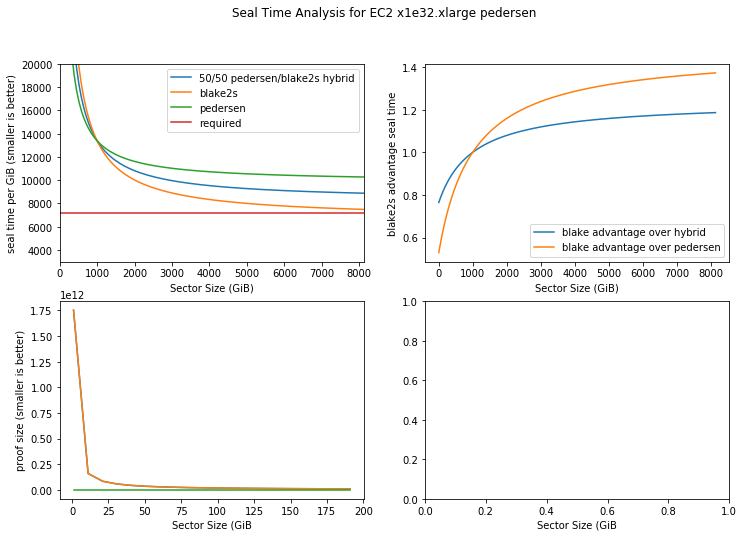

Seal rates cross at about 1.0 TB


In [41]:
graph_hash_seal_times(x1e32, filecoin_scaling_requirements)

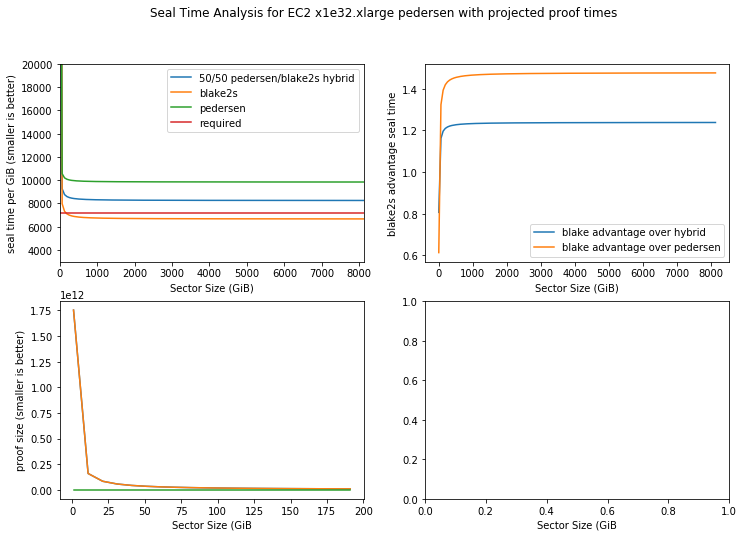

Seal rates cross at about 65.0 GB


In [42]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)
graph_hash_seal_times(projected_pedersen, filecoin_scaling_requirements)

What's the minimum viable sector size for a 50/50 pedersen/blake2s hybrid on x1e32?

In [43]:
humanize_bytes(minimum_viable_sector_size(filecoin_scaling_requirements, x1_pb50))

'0.0 bytes'

Blake?

In [44]:
humanize_bytes(minimum_viable_sector_size(filecoin_scaling_requirements, x1_blake2s))

'16.0 TB'

Pedersen?

In [45]:
minimum_viable_sector_size(filecoin_scaling_requirements, x1e32)

0

In [46]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)

In [47]:
humanize_bytes(minimum_viable_sector_size(filecoin_scaling_requirements, projected_pedersen))

'0.0 bytes'

In [48]:
humanize_bytes(minimum_viable_sector_size(filecoin_scaling_requirements, projected_blake2s))

'256.0 GB'